In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import logit
from scipy.stats import norm
from scipy import linalg
import math
from sklearn.metrics import confusion_matrix
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

## Project

In [2]:
# Loading the data onto Jupyter Notebooks
initial_data = pd.read_csv('clean_data_2016.csv')

initial_data

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,295,17051828,4.0,4.0,4969.0,6111.0,34433200.0,-119303320.0,120226.0,1.0,...,2061.0,97099.0,8.0,1989.0,768000.0,2195000.0,2015.0,1427000.0,24389.58,6.111001e+13
1,296,17052152,2.0,3.0,1800.0,6111.0,34464778.0,-119197656.0,19323.0,0.0,...,2061.0,97099.0,0.0,1932.0,315000.0,783000.0,2015.0,468000.0,8516.04,6.111001e+13
2,297,17052992,1.0,2.0,780.0,6111.0,34450686.0,-119278912.0,6900.0,0.0,...,2061.0,97099.0,4.0,1971.0,69177.0,87400.0,2015.0,18223.0,1633.28,6.111001e+13
3,298,17053038,2.0,2.0,1250.0,6111.0,34448639.0,-119277621.0,4125.0,0.0,...,2061.0,97099.0,4.0,1978.0,78381.0,229920.0,2015.0,151539.0,3162.08,6.111001e+13
4,299,17053061,1.0,2.0,1404.0,6111.0,34450089.0,-119277534.0,7500.0,0.0,...,2061.0,97099.0,5.0,1950.0,98354.0,309132.0,2015.0,210778.0,3951.70,6.111001e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625276,2973731,14495236,2.5,3.0,1941.0,6059.0,33635478.0,-117597518.0,1154.0,0.0,...,1286.0,96993.0,0.0,2013.0,299566.0,517893.0,2015.0,218327.0,6598.44,6.059032e+13
2625277,2973742,11302841,2.0,4.0,2360.0,6037.0,34689046.0,-118066841.0,7531.0,0.0,...,3101.0,97318.0,0.0,2013.0,201752.0,269070.0,2015.0,67318.0,4293.01,6.037901e+13
2625278,2973753,13963342,3.0,4.0,2541.0,6059.0,33687040.0,-117753537.0,3398.0,0.0,...,1286.0,96954.0,0.0,2013.0,437765.0,441342.0,2015.0,3577.0,15568.38,6.059032e+13
2625279,2973757,17275231,2.0,3.0,1917.0,6111.0,34187313.0,-118845451.0,69790.0,0.0,...,2061.0,96385.0,6.0,1946.0,123548.0,402544.0,2015.0,278996.0,4251.00,6.111007e+13


In [3]:
data = initial_data[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'poolcnt', 'regionidzip', 'yearbuilt', 'taxvaluedollarcnt']]

data

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,poolcnt,regionidzip,yearbuilt,taxvaluedollarcnt
0,4.0,4.0,4969.0,34433200.0,-119303320.0,1.0,97099.0,1989.0,2195000.0
1,2.0,3.0,1800.0,34464778.0,-119197656.0,0.0,97099.0,1932.0,783000.0
2,1.0,2.0,780.0,34450686.0,-119278912.0,0.0,97099.0,1971.0,87400.0
3,2.0,2.0,1250.0,34448639.0,-119277621.0,0.0,97099.0,1978.0,229920.0
4,1.0,2.0,1404.0,34450089.0,-119277534.0,0.0,97099.0,1950.0,309132.0
...,...,...,...,...,...,...,...,...,...
2625276,2.5,3.0,1941.0,33635478.0,-117597518.0,0.0,96993.0,2013.0,517893.0
2625277,2.0,4.0,2360.0,34689046.0,-118066841.0,0.0,97318.0,2013.0,269070.0
2625278,3.0,4.0,2541.0,33687040.0,-117753537.0,0.0,96954.0,2013.0,441342.0
2625279,2.0,3.0,1917.0,34187313.0,-118845451.0,0.0,96385.0,1946.0,402544.0


In [4]:
data = data.head(2625281)

data

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,poolcnt,regionidzip,yearbuilt,taxvaluedollarcnt
0,4.0,4.0,4969.0,34433200.0,-119303320.0,1.0,97099.0,1989.0,2195000.0
1,2.0,3.0,1800.0,34464778.0,-119197656.0,0.0,97099.0,1932.0,783000.0
2,1.0,2.0,780.0,34450686.0,-119278912.0,0.0,97099.0,1971.0,87400.0
3,2.0,2.0,1250.0,34448639.0,-119277621.0,0.0,97099.0,1978.0,229920.0
4,1.0,2.0,1404.0,34450089.0,-119277534.0,0.0,97099.0,1950.0,309132.0
...,...,...,...,...,...,...,...,...,...
2625276,2.5,3.0,1941.0,33635478.0,-117597518.0,0.0,96993.0,2013.0,517893.0
2625277,2.0,4.0,2360.0,34689046.0,-118066841.0,0.0,97318.0,2013.0,269070.0
2625278,3.0,4.0,2541.0,33687040.0,-117753537.0,0.0,96954.0,2013.0,441342.0
2625279,2.0,3.0,1917.0,34187313.0,-118845451.0,0.0,96385.0,1946.0,402544.0


### Part 1

#### Fit a multiple linear regression that uses all of the predictors (i.e. 8 predictors, plus an intercept).

In [5]:
# First make the multiple linear regression formula using a for loop iterating over each column name of interest
multiple_linear_formula = 'taxvaluedollarcnt ~ 1'
for column_name in data.columns[0:8]:
    multiple_linear_formula += ' + '
    multiple_linear_formula += column_name

multiple_linear_formula_model = ols(multiple_linear_formula, data).fit()

print(multiple_linear_formula_model.summary())

                            OLS Regression Results                            
Dep. Variable:      taxvaluedollarcnt   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                 1.445e+05
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:13:50   Log-Likelihood:            -3.8082e+07
No. Observations:             2625281   AIC:                         7.616e+07
Df Residuals:                 2625272   BIC:                         7.616e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

#### What are the p-values of the slope for each of the predictors?

In [6]:
print("Slope P-value (bathroomcnt) = ", multiple_linear_formula_model.pvalues['bathroomcnt'])
print("Slope P-value (bedroomcnt) = ", multiple_linear_formula_model.pvalues['bedroomcnt'])
print("Slope P-value (calculatedfinishedsquarefeet) = ", multiple_linear_formula_model.pvalues['calculatedfinishedsquarefeet'])
print("Slope P-value (latitude) = ", multiple_linear_formula_model.pvalues['latitude'])
print("Slope P-value (longitude) = ", multiple_linear_formula_model.pvalues['longitude'])
print("Slope P-value (poolcnt) = ", multiple_linear_formula_model.pvalues['poolcnt'])
print("Slope P-value (regionidzip) = ", multiple_linear_formula_model.pvalues['regionidzip'])
print("Slope P-value (yearbuilt) = ", multiple_linear_formula_model.pvalues['yearbuilt'])

Slope P-value (bathroomcnt) =  0.0
Slope P-value (bedroomcnt) =  0.0
Slope P-value (calculatedfinishedsquarefeet) =  0.0
Slope P-value (latitude) =  0.0
Slope P-value (longitude) =  0.0
Slope P-value (poolcnt) =  0.0
Slope P-value (regionidzip) =  3.506224176311899e-68
Slope P-value (yearbuilt) =  7.423325399324154e-269


### Part 2
#### Perform 5-fold cross-validation for the Multiple Linear Regression and Random Forest Regression model. Report the mean test set MSE.

In [8]:
data_part7 = data.copy()

kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(data_part7)

mse_multiple_linear_regression = []
mse_random_forest_regression = []

K = 0
P = 8 # Number of predictors

for train_index, test_index in kf.split(data_part7):
    #print("TRAIN:", train_index, "TEST:", test_index)
    data_train, data_test = data_part7.iloc[list(train_index),:], data_part7.iloc[list(test_index),:]
    
    ### Part 1. Multiple Linear Regression model: ###
    # Step 1: Fit the model to the training data, using predictor
    multiple_linear_formula = 'taxvaluedollarcnt ~ 1'
    for column_name in data.columns[0:8]:
        multiple_linear_formula += ' + '
        multiple_linear_formula += column_name

    multiple_linear_formula_model = ols(multiple_linear_formula, data_train).fit()

    # Step 2: Find the predicted values of the training set using the current model
    prediction_multiple_linear = multiple_linear_formula_model.predict(data_test)

    # Step 3: Find the MSE for the current model and save
    mse_multiple_linear_regression.append(mean_squared_error(data_test['taxvaluedollarcnt'], prediction_multiple_linear))
    
    print('Finished Multiple Linear Regression for %d' % (K))
    # Part 2. Random Forest model:
    # Step 1: Fit the model to the training data, using predictor
    # feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
    # feature_names
    rf = RandomForestRegressor(random_state=0)
    rf.fit(data_train.iloc[: , :P], data_train['taxvaluedollarcnt'])
    
    # Step 2: Find the predicted values of the training set using the current model
    rf_y_true = data_test['taxvaluedollarcnt']
    rf_y_pred = rf.predict(data_test.iloc[: , :P])
    # predict(X)
    
    # Step 3: Find the MSE for the current model and save
    mse_random_forest_regression.append(mean_squared_error(rf_y_true, rf_y_pred))
    
    print('Finished Random Forest Regression for %d' % (K))
     
        
    K += 1


Finished Multiple Linear Regression for 0
Finished Random Forest Regression for 0
Finished Multiple Linear Regression for 1
Finished Random Forest Regression for 1
Finished Multiple Linear Regression for 2
Finished Random Forest Regression for 2
Finished Multiple Linear Regression for 3
Finished Random Forest Regression for 3
Finished Multiple Linear Regression for 4
Finished Random Forest Regression for 4
Finished Multiple Linear Regression for 5
Finished Random Forest Regression for 5
Finished Multiple Linear Regression for 6
Finished Random Forest Regression for 6
Finished Multiple Linear Regression for 7
Finished Random Forest Regression for 7
Finished Multiple Linear Regression for 8
Finished Random Forest Regression for 8
Finished Multiple Linear Regression for 9
Finished Random Forest Regression for 9


### Part 3
#### Report the Average Mean Squared Error of each model. Plot the Average Mean Squared Error's of each model.

In [9]:
#print("Average MSE FSS = ", sum(mse_model_fss)/10)
print("Average MSE Multiple Linear Regression = ", sum(mse_multiple_linear_regression)/10)
print("Average MSE Random Forest Regression = ", sum(mse_random_forest_regression)/10)

Average MSE Multiple Linear Regression =  251509918980.45117
Average MSE Random Forest Regression =  136870331134.25725


In [12]:
min([sum(mse_multiple_linear_regression)/10, sum(mse_random_forest_regression)/10])

136870331134.25725

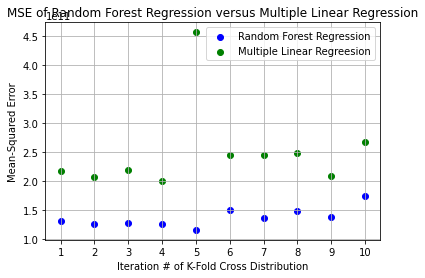

In [13]:
plt.scatter(range(1,10+1), mse_random_forest_regression, marker='o', color='blue', label='Random Forest Regression')
plt.scatter(range(1,10+1), mse_multiple_linear_regression, marker='o', color='green', label='Multiple Linear Regreesion')
plt.title('MSE of Random Forest Regression versus Multiple Linear Regression')
plt.xlabel('Iteration # of K-Fold Cross Distribution')
plt.xticks(range(1,10+1))
plt.ylabel('Mean-Squared Error')
plt.legend()
plt.grid()

### Based on the results above, we conclude that random forest regressor is the better model. ###

In [34]:
# save the model to local
import pickle
# from sklearn.externals import joblib
import joblib

# Save the model as a pickle in a file

joblib.dump(rf, 'my_rfr.pkl')

 
# Load the model from the file
# knn_from_joblib = joblib.load('filename.pkl')
 
# Use the loaded model to make predictions
# knn_from_joblib.predict(X_test)


['my_rfr.pkl']

In [35]:
# Load the model from the file
# Only load the model once
rf_from_joblib = joblib.load('my_rfr.pkl')
 
# Use the loaded model to make predictions
# rf_from_joblib.predict(np.array([0, 0, 0, 0, 0, 0, 0, 0]).reshape(1, -1))


array([1540221.09])

In [39]:
rf_from_joblib.predict(np.array([0, 0, 0, 0, 0, 0, 0, 0]).reshape(1, -1))

array([1540221.09])

In [40]:
joblib.dump(multiple_linear_formula_model, 'my_mlfr.pkl')

['my_mlfr.pkl']

In [41]:
mlfr_from_joblib = joblib.load('my_mlfr.pkl')

In [ ]:
mlfr_from_joblib.predict(np.array([0, 0, 0, 0, 0, 0, 0, 0]).reshape(1, -1))

ERROR! Session/line number was not unique in database. History logging moved to new session 43


### Part 4

#### Now we to find all unique zipcodes in the dataset.

In [29]:
zipcodes = list(initial_data.regionidzip.unique())
len(zipcodes)

392

#### Our current feature is bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet,	latitude,	longitude,	poolcnt, regionidzip, yearbuilt. 
#### The responsive variable is taxvaluedollarcnt. 
#### To make our data stories relatable, we choose three fundamental family options: 
a. Two bedrooms, two bathrooms housing for two to four college students.

b. One bedroom, one bathroom housing for one working professional.

c. Three bedrooms, three bathrooms housing for a family of two parents and two children.

For each zipcode, we create three corresponding samples, each of which has eight features. 
The squarefeet for each housing option, we used the data from https://www.rentcafe.com/blog/rental-market/real-estate-news/us-average-apartment-size-trends-downward/

a. For two bedrooms, two bathrooms apartment, the average squarefeet is 1030.

b. For one bedroom, one bathroom apartment, the average squarefeet is 722.

c. For three bedroom, three 
#### First of all, we look for the mean and median of three housing options from our own dataset.

In [55]:
# Two bedrooms, two bathrooms housing:

mean_two_two = data.loc[(data.bathroomcnt == 2.0) & (data.bedroomcnt == 2.0)].calculatedfinishedsquarefeet.mean()
median_two_two = data.loc[(data.bathroomcnt == 2.0) & (data.bedroomcnt == 2.0)].calculatedfinishedsquarefeet.median()  
    

In [57]:
mean_two_two,median_two_two

(1302.6354811153521, 1242.0)

In [75]:
# Normality test for two bedroom and two bathroom:

from scipy.stats import normaltest
stat, p = normaltest(data.head(5000).loc[(data.bathroomcnt == 2.0) & (data.bedroomcnt == 2.0)].calculatedfinishedsquarefeet)
p

7.882346817846547e-16

In [76]:
import seaborn as sns

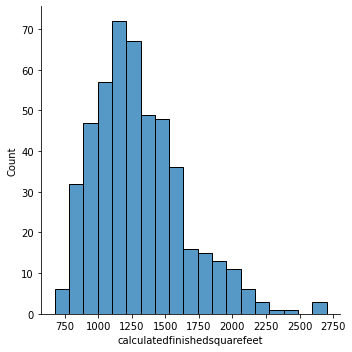

In [77]:
ax = sns.displot(data.head(5000).loc[(data.bathroomcnt == 2.0) & (data.bedroomcnt == 2.0)].calculatedfinishedsquarefeet)

#### Since the distribution is not normal, we use median as approximate housing size for two bedroom and two bathroom housing.

In [58]:
# One bedroom, one bathroom housing:

mean_one_one = data.loc[(data.bathroomcnt == 1.0) & (data.bedroomcnt == 1.0)].calculatedfinishedsquarefeet.mean()
median_one_one = data.loc[(data.bathroomcnt == 1.0) & (data.bedroomcnt == 1.0)].calculatedfinishedsquarefeet.median()


In [59]:
mean_one_one, median_one_one

(746.785456753577, 710.0)

In [79]:
from scipy.stats import normaltest
stat, p = normaltest(data.head(5000).loc[(data.bathroomcnt == 1.0) & (data.bedroomcnt == 1.0)].calculatedfinishedsquarefeet)
p

3.512243360164967e-18

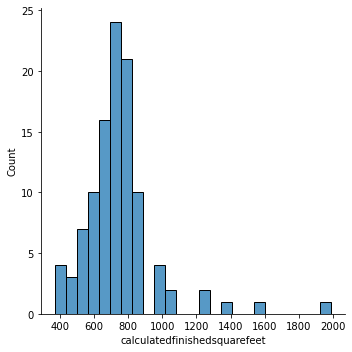

In [80]:
ax = sns.displot(data.head(5000).loc[(data.bathroomcnt == 1.0) & (data.bedroomcnt == 1.0)].calculatedfinishedsquarefeet)

#### Since the distribution is not normal, we use median as approximate housing size for one bedroom and one bathroom housing.

In [82]:
# Three bedrooms and three bathrooms:

mean_three_three = data.loc[(data.bathroomcnt == 3.0) & (data.bedroomcnt == 3.0)].calculatedfinishedsquarefeet.mean()
median_three_three = data.loc[(data.bathroomcnt == 3.0) & (data.bedroomcnt == 3.0)].calculatedfinishedsquarefeet.median()


In [83]:
mean_three_three, median_three_three

(2010.7812527223625, 1915.0)

In [84]:
from scipy.stats import normaltest
stat, p = normaltest(data.head(5000).loc[(data.bathroomcnt == 3.0) & (data.bedroomcnt == 3.0)].calculatedfinishedsquarefeet)
p

2.5944537013109064e-28

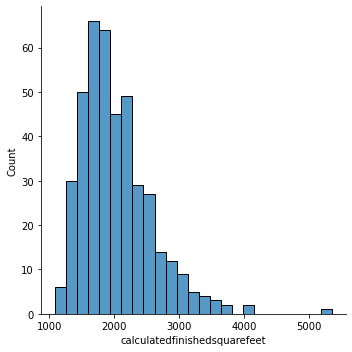

In [85]:
ax = sns.displot(data.head(5000).loc[(data.bathroomcnt == 3.0) & (data.bedroomcnt == 3.0)].calculatedfinishedsquarefeet)

#### Since the distribution is not normal, we use median as approximate housing size for three bedrooms and three bathrooms housing.

#### For latitude and longitude

In [88]:
# ax = sns.displot(data.head(5000).loc[(data.bathroomcnt == 3.0) & (data.bedroomcnt == 3.0)].calculatedfinishedsquarefeet)

In [89]:
def zip_average_lat(zipcode):
    '''
    zipcode:
    '''
    return data.loc[data.regionidzip == zipcode].latitude.mean()

In [93]:
def zip_average_lon(zipcode):
    '''
    zipcode:
    '''
    return data.loc[data.regionidzip == zipcode].longitude.mean()

In [94]:
zip_average_lat(97099.0)

34444217.95670701

In [95]:
zip_average_lon(97099.0)

-119258660.18629624

#### For yearbuilt

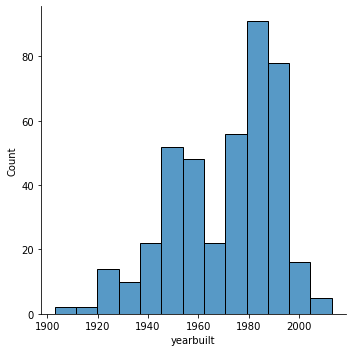

In [96]:
ax = sns.displot(data.head(5000).loc[(data.bathroomcnt == 3.0) & (data.bedroomcnt == 3.0)].yearbuilt)

In [100]:
median_year_built_33 = data.loc[(data.bathroomcnt == 3.0) & (data.bedroomcnt == 3.0)].yearbuilt.median()
median_year_built_33

1980.0

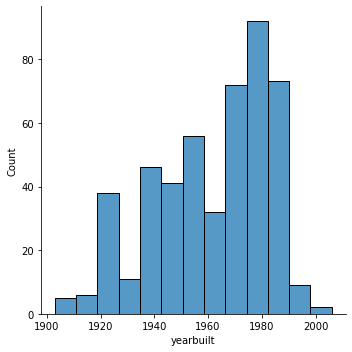

In [97]:
ax = sns.displot(data.head(5000).loc[(data.bathroomcnt == 2.0) & (data.bedroomcnt == 2.0)].yearbuilt)

In [101]:
median_year_built_22 = data.loc[(data.bathroomcnt == 2.0) & (data.bedroomcnt == 2.0)].yearbuilt.median()
median_year_built_22

1970.0

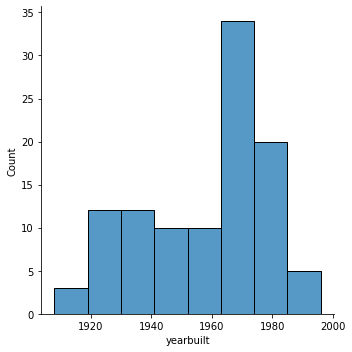

In [98]:
ax = sns.displot(data.head(5000).loc[(data.bathroomcnt == 1.0) & (data.bedroomcnt == 1.0)].yearbuilt)

In [104]:
median_year_built_11 = data.loc[(data.bathroomcnt == 1.0) & (data.bedroomcnt == 1.0)].yearbuilt.median()
median_year_built_11

1966.0

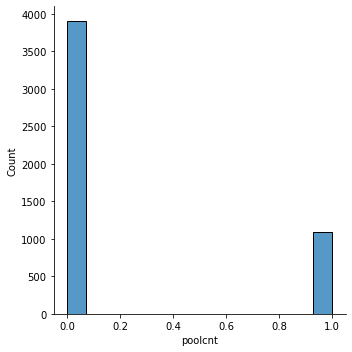

In [106]:
ax = sns.displot(data.head(5000).poolcnt)

### Time to build our sample space for data stories!

### Part 5

#### $ Feature: bathroomcnt	bedroomcnt	calculatedfinishedsquarefeet	latitude	longitude	poolcnt	regionidzip	yearbuilt	

In [132]:
ds_X = []
for z in zipcodes:
    new_1 = [1, 1, median_one_one, zip_average_lat(z), zip_average_lon(z), 0, z, median_year_built_11]
    new_2 = [2, 2, median_two_two, zip_average_lat(z), zip_average_lon(z), 0, z, median_year_built_22]
    new_3 = [3, 3, median_three_three, zip_average_lat(z), zip_average_lon(z), 0, z, median_year_built_33]
    ds_X.append(new_1)
    ds_X.append(new_2)
    ds_X.append(new_3)

In [133]:
len(ds_X)

1176

In [134]:
ds_X

[[1, 1, 710.0, 34444217.95670701, -119258660.18629624, 0, 97099.0, 1966.0],
 [2, 2, 1242.0, 34444217.95670701, -119258660.18629624, 0, 97099.0, 1970.0],
 [3, 3, 1915.0, 34444217.95670701, -119258660.18629624, 0, 97099.0, 1980.0],
 [1, 1, 710.0, 34402131.7470107, -119297843.19572058, 0, 97098.0, 1966.0],
 [2, 2, 1242.0, 34402131.7470107, -119297843.19572058, 0, 97098.0, 1970.0],
 [3, 3, 1915.0, 34402131.7470107, -119297843.19572058, 0, 97098.0, 1980.0],
 [1, 1, 710.0, 34289960.41611024, -119287603.80139224, 0, 97081.0, 1966.0],
 [2, 2, 1242.0, 34289960.41611024, -119287603.80139224, 0, 97081.0, 1970.0],
 [3, 3, 1915.0, 34289960.41611024, -119287603.80139224, 0, 97081.0, 1980.0],
 [1, 1, 710.0, 34355534.0745491, -119072494.11683367, 0, 97113.0, 1966.0],
 [2, 2, 1242.0, 34355534.0745491, -119072494.11683367, 0, 97113.0, 1970.0],
 [3, 3, 1915.0, 34355534.0745491, -119072494.11683367, 0, 97113.0, 1980.0],
 [1, 1, 710.0, 34401447.69152886, -118919464.03746203, 0, 97094.0, 1966.0],
 [2, 2, 12

In [135]:
ds_y = []
for x in ds_X:
    ds_y.append(rf.predict(np.array(x).reshape(1, -1)))

In [136]:
ds_y

[array([239209.1657619]),
 array([327053.35666667]),
 array([469369.47]),
 array([269052.17577778]),
 array([276395.87]),
 array([411970.07]),
 array([270447.51933333]),
 array([226858.43]),
 array([364449.72]),
 array([155386.67077778]),
 array([161196.55]),
 array([362740.01]),
 array([113029.05411905]),
 array([231499.2]),
 array([349319.71]),
 array([161163.47323591]),
 array([228520.2775]),
 array([391167.93]),
 array([156910.12289683]),
 array([299083.99]),
 array([325748.02]),
 array([138692.63689683]),
 array([266107.34]),
 array([369696.36]),
 array([142311.05206349]),
 array([274010.04]),
 array([375350.01]),
 array([165257.43008652]),
 array([236656.35]),
 array([332415.36]),
 array([153110.50416667]),
 array([231041.06]),
 array([360066.24]),
 array([171685.19797619]),
 array([244345.15]),
 array([317861.25]),
 array([147694.12883333]),
 array([289109.31]),
 array([428075.53]),
 array([194782.0425]),
 array([259265.47]),
 array([231923.5]),
 array([163874.2703803]),
 array(

In [137]:
result = []
for i in range(len(ds_X)):
    new = ds_X[i]
    new.append(ds_y[i][0])
    result.append(new)


In [139]:
# result

In [143]:
final = pd.DataFrame(result, columns = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 
                                        'latitude', 'longitude', 'poolcnt', 'regionidzip', 'yearbuilt',
                                        'taxvaluedollarcnt'])
final

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,poolcnt,regionidzip,yearbuilt,taxvaluedollarcnt
0,1,1,710.0,3.444422e+07,-1.192587e+08,0,97099.0,1966.0,239209.165762
1,2,2,1242.0,3.444422e+07,-1.192587e+08,0,97099.0,1970.0,327053.356667
2,3,3,1915.0,3.444422e+07,-1.192587e+08,0,97099.0,1980.0,469369.470000
3,1,1,710.0,3.440213e+07,-1.192978e+08,0,97098.0,1966.0,269052.175778
4,2,2,1242.0,3.440213e+07,-1.192978e+08,0,97098.0,1970.0,276395.870000
...,...,...,...,...,...,...,...,...,...
1171,2,2,1242.0,3.404900e+07,-1.185280e+08,0,96034.0,1970.0,417632.178857
1172,3,3,1915.0,3.404900e+07,-1.185280e+08,0,96034.0,1980.0,695105.157333
1173,1,1,710.0,3.402299e+07,-1.182834e+08,0,96069.0,1966.0,116957.245833
1174,2,2,1242.0,3.402299e+07,-1.182834e+08,0,96069.0,1970.0,214200.322500


In [145]:
final.to_csv('datastories_table.csv')